In [1]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


In [2]:
df = pd.read_csv("/content/AB_NYC_2019.csv.zip")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [5]:
df['host_name']

,host_name
0,John
1,Jennifer
2,Elisabeth
3,LisaRoxanne
4,Laura
...,...
48890,Sabrina
48891,Marisol
48892,Ilgar & Aysel
48893,Taz


In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
df['host_name'].fillna("Unknown", inplace=True)
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
df["reviews_per_month"].fillna(df["reviews_per_month"].median(), inplace=True)
df.head(5)

<ipython-input-9-cf90a2bdfc9b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["reviews_per_month"].fillna(df["reviews_per_month"].median(), inplace=True)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [11]:
df['name'].fillna('Unknown', inplace=True)
df.head(10)

<ipython-input-11-b8887d47e224>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Unknown', inplace=True)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [12]:
df['last_review']=pd.to_datetime(df['last_review'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48895 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48895 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [13]:
df.duplicated().sum()


0

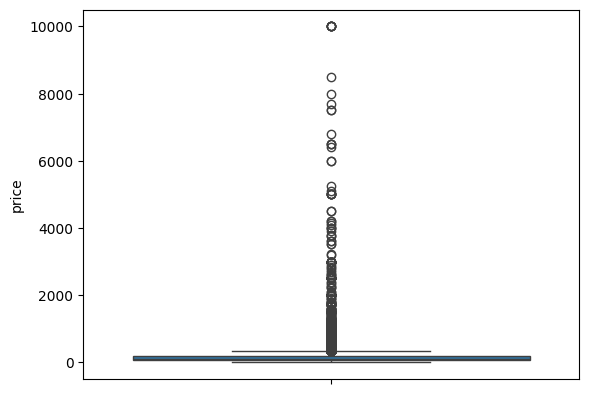

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['price'])
plt.show()

In [15]:
df.shape

(48895, 16)

In [16]:
df['price'].describe()

,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


In [17]:
Q1 = df['price'].quantile(0.25)  # 25th percentile
Q3 = df['price'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define lower and upper bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Display the calculated bounds
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Lower Bound: -90.0, Upper Bound: 334.0


In [18]:
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


In [19]:
df.shape

(45923, 16)

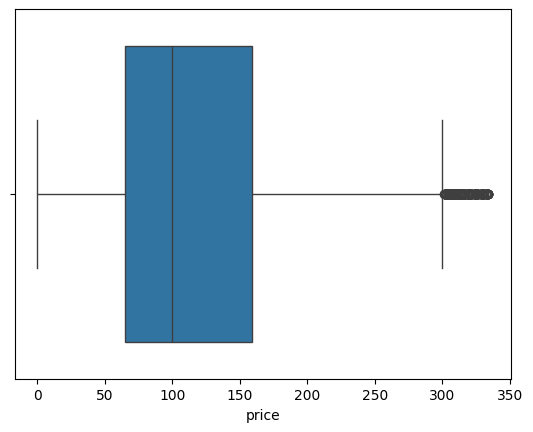

In [20]:
sns.boxplot(x=df['price'])
plt.show()

In [21]:
df['price'].describe()

,price
count,45923.000000
mean,119.970320
std,68.150148
min,0.000000
25%,65.000000
50%,100.000000
75%,159.000000
max,334.000000


In [22]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [23]:
df = pd.get_dummies(df, columns=["room_type"], drop_first=True)


In [24]:
scaler = MinMaxScaler()
df[['price', 'availability_365', 'minimum_nights']] = scaler.fit_transform(df[['price', 'availability_365', 'minimum_nights']])
df.tail(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,0.209581,0.000801,0,NaT,0.72,2,0.024658,True,False
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,0.119760,0.002402,0,NaT,0.72,2,0.098630,True,False
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,0.344311,0.007206,0,NaT,0.72,1,0.073973,False,False
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,0.164671,0.000000,0,NaT,0.72,6,0.005479,False,True
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,0.269461,0.004804,0,NaT,0.72,1,0.063014,True,False


In [25]:
df['last_review_year']= df['last_review'].dt.year
df['last_review_month']= df['last_review'].dt.month
df['last_review_day']= df['last_review'].dt.day
df.drop('last_review', axis=1, inplace=True)
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room,last_review_year,last_review_month,last_review_day
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,0.446108,0.000000,9,0.21,6,1.000000,True,False,2018.0,10.0,19.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,0.673653,0.000000,45,0.38,2,0.972603,False,False,2019.0,5.0,21.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,0.449102,0.001601,0,0.72,1,1.000000,True,False,NaN,NaN,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,0.266467,0.000000,270,4.64,1,0.531507,False,False,2019.0,7.0,5.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,0.239521,0.007206,9,0.10,1,0.000000,False,False,2018.0,11.0,19.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45923 entries, 0 to 48894
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45923 non-null  int64  
 1   name                            45923 non-null  object 
 2   host_id                         45923 non-null  int64  
 3   host_name                       45923 non-null  object 
 4   neighbourhood_group             45923 non-null  object 
 5   neighbourhood                   45923 non-null  object 
 6   latitude                        45923 non-null  float64
 7   longitude                       45923 non-null  float64
 8   price                           45923 non-null  float64
 9   minimum_nights                  45923 non-null  float64
 10  number_of_reviews               45923 non-null  int64  
 11  reviews_per_month               45923 non-null  float64
 12  calculated_host_listings_count  45923

In [27]:
df[['last_review_year', 'last_review_month', 'last_review_day']] = df[['last_review_year', 'last_review_month', 'last_review_day']].fillna(0)


In [28]:
df = pd.get_dummies(df, columns=["neighbourhood_group"], drop_first=True)
df.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,availability_365,room_type_Private room,room_type_Shared room,last_review_year,last_review_month,last_review_day,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,0.446108,0.000000,9,...,1.000000,True,False,2018.0,10.0,19.0,True,False,False,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,0.673653,0.000000,45,...,0.972603,False,False,2019.0,5.0,21.0,False,True,False,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,0.449102,0.001601,0,...,1.000000,True,False,0.0,0.0,0.0,False,True,False,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,0.266467,0.000000,270,...,0.531507,False,False,2019.0,7.0,5.0,True,False,False,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,0.239521,0.007206,9,...,0.000000,False,False,2018.0,11.0,19.0,False,True,False,False


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45923 entries, 0 to 48894
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 45923 non-null  int64  
 1   name                               45923 non-null  object 
 2   host_id                            45923 non-null  int64  
 3   host_name                          45923 non-null  object 
 4   neighbourhood                      45923 non-null  object 
 5   latitude                           45923 non-null  float64
 6   longitude                          45923 non-null  float64
 7   price                              45923 non-null  float64
 8   minimum_nights                     45923 non-null  float64
 9   number_of_reviews                  45923 non-null  int64  
 10  reviews_per_month                  45923 non-null  float64
 11  calculated_host_listings_count     45923 non-null  int64  


In [30]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day
count,4.592300e+04,4.592300e+04,45923.000000,45923.000000,45923.000000,45923.000000,45923.000000,45923.000000,45923.000000,45923.000000,45923.000000,45923.000000,45923.000000
mean,1.889853e+07,6.632693e+07,40.728488,-73.950733,0.359193,0.004754,23.942665,1.249033,6.639701,0.299668,1622.213248,4.957516,12.701304
std,1.091922e+07,7.755778e+07,0.055331,0.046471,0.204042,0.015899,45.315219,1.539282,31.008148,0.356930,801.577905,3.338215,10.861509
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,0.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.436180e+06,7.724081e+06,40.689235,-73.981925,0.194611,0.000000,1.000000,0.270000,1.000000,0.000000,2016.000000,1.000000,1.000000
50%,1.952568e+07,3.028359e+07,40.721770,-73.954370,0.299401,0.000801,5.000000,0.720000,1.000000,0.106849,2019.000000,6.000000,11.000000
75%,2.891256e+07,1.055068e+08,40.763390,-73.934315,0.476048,0.003203,24.000000,1.620000,2.000000,0.594521,2019.000000,7.000000,23.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,1.000000,1.000000,629.000000,58.500000,327.000000,1.000000,2019.000000,12.000000,31.000000


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
df.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,availability_365,room_type_Private room,room_type_Shared room,last_review_year,last_review_month,last_review_day,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,0.446108,0.000000,9,...,1.000000,True,False,2018.0,10.0,19.0,True,False,False,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,0.673653,0.000000,45,...,0.972603,False,False,2019.0,5.0,21.0,False,True,False,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,0.449102,0.001601,0,...,1.000000,True,False,0.0,0.0,0.0,False,True,False,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,0.266467,0.000000,270,...,0.531507,False,False,2019.0,7.0,5.0,True,False,False,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,0.239521,0.007206,9,...,0.000000,False,False,2018.0,11.0,19.0,False,True,False,False


In [33]:
df.drop(columns=['id', 'name', 'host_name'], inplace=True)
df.head(5)

,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room,last_review_year,last_review_month,last_review_day,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,2787,Kensington,40.64749,-73.97237,0.446108,0.000000,9,0.21,6,1.000000,True,False,2018.0,10.0,19.0,True,False,False,False
1,2845,Midtown,40.75362,-73.98377,0.673653,0.000000,45,0.38,2,0.972603,False,False,2019.0,5.0,21.0,False,True,False,False
2,4632,Harlem,40.80902,-73.94190,0.449102,0.001601,0,0.72,1,1.000000,True,False,0.0,0.0,0.0,False,True,False,False
3,4869,Clinton Hill,40.68514,-73.95976,0.266467,0.000000,270,4.64,1,0.531507,False,False,2019.0,7.0,5.0,True,False,False,False
4,7192,East Harlem,40.79851,-73.94399,0.239521,0.007206,9,0.10,1,0.000000,False,False,2018.0,11.0,19.0,False,True,False,False


In [34]:
df.drop(columns=['neighbourhood'], inplace=True)
df.head(5)


,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room,last_review_year,last_review_month,last_review_day,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,2787,40.64749,-73.97237,0.446108,0.000000,9,0.21,6,1.000000,True,False,2018.0,10.0,19.0,True,False,False,False
1,2845,40.75362,-73.98377,0.673653,0.000000,45,0.38,2,0.972603,False,False,2019.0,5.0,21.0,False,True,False,False
2,4632,40.80902,-73.94190,0.449102,0.001601,0,0.72,1,1.000000,True,False,0.0,0.0,0.0,False,True,False,False
3,4869,40.68514,-73.95976,0.266467,0.000000,270,4.64,1,0.531507,False,False,2019.0,7.0,5.0,True,False,False,False
4,7192,40.79851,-73.94399,0.239521,0.007206,9,0.10,1,0.000000,False,False,2018.0,11.0,19.0,False,True,False,False


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45923 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   host_id                            45923 non-null  int64  
 1   latitude                           45923 non-null  float64
 2   longitude                          45923 non-null  float64
 3   price                              45923 non-null  float64
 4   minimum_nights                     45923 non-null  float64
 5   number_of_reviews                  45923 non-null  int64  
 6   reviews_per_month                  45923 non-null  float64
 7   calculated_host_listings_count     45923 non-null  int64  
 8   availability_365                   45923 non-null  float64
 9   room_type_Private room             45923 non-null  bool   
 10  room_type_Shared room              45923 non-null  bool   
 11  last_review_year                   45923 non-null  float64


In [37]:
X= df.drop(columns=['price'])
y= df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (36738, 17)
Testing Data Shape: (9185, 17)


In [38]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [39]:
mae= mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse= mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.10932373381885892
Mean Squared Error: 0.021819709325910694
Root Mean Squared Error: 0.14771495972280768
R-squared: 0.4774619413387444


In [40]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [41]:
mae= mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse= mse ** 0.5
r2 = r2_score(y_test, y_pred_rf)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.09500892933784039
Mean Squared Error: 0.017734006808491656
Root Mean Squared Error: 0.13316909104026975
R-squared: 0.5753062815098728


In [42]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree R² Score:", r2_score(y_test, y_pred_dt))


Decision Tree R² Score: 0.5101678487701886


In [43]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost R² Score:", r2_score(y_test, y_pred_xgb))


XGBoost R² Score: 0.5881603242563542


In [44]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

print("LightGBM R² Score:", r2_score(y_test, y_pred_lgbm))


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1693
[LightGBM] [Info] Number of data points in the train set: 36738, number of used features: 17
[LightGBM] [Info] Start training from score 0.358925
LightGBM R² Score: 0.5889998008636141


In [45]:
from sklearn.svm import SVR

svr_model = SVR(kernel="rbf")
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

print("SVR R² Score:", r2_score(y_test, y_pred_svr))


SVR R² Score: -0.02230515681856393


Hyperparameter Tuning for LightGBM

In [46]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

In [48]:
param_grid= {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth' : [5, 10, 15]
}

lgbm = LGBMRegressor(random_state =42)

grid_search = GridSearchCV(lgbm, param_grid, cv=3, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

best_lgbm = grid_search.best_estimator_
y_pred_best = best_lgbm.predict(X_test)
print("Best LightGBM R² Score:", r2_score(y_test, y_pred_best))

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

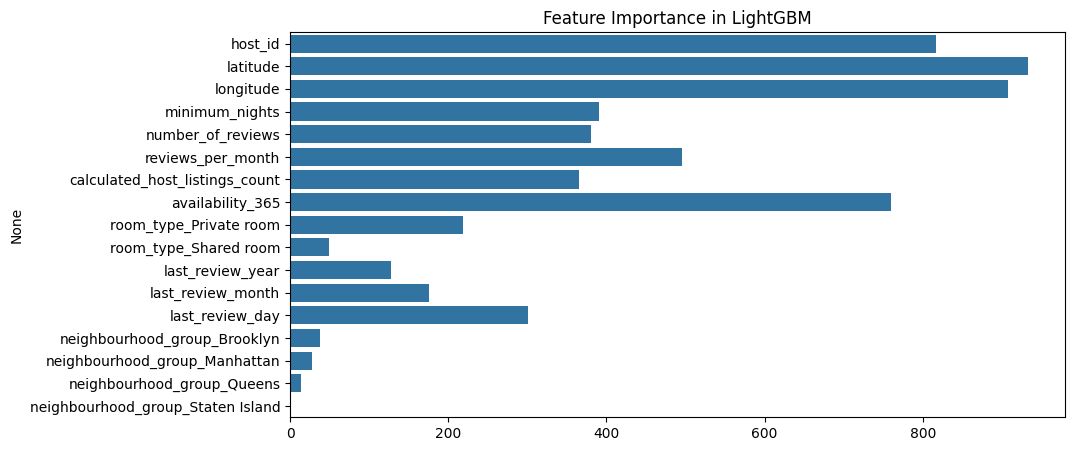

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = best_lgbm.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance, y=feature_names)
plt.title("Feature Importance in LightGBM")
plt.show()


In [52]:
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [54]:
from sklearn.ensemble import StackingRegressor, HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

# Define Base Models
stack_model = StackingRegressor(estimators=[
    ('hist', HistGradientBoostingRegressor(random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42))
], final_estimator=Ridge())  # Ridge Regression as meta-model

# Fit the Stacked Model
stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)

print("Stacked Model R² Score:", r2_score(y_test, y_pred_stack))


Stacked Model R² Score: 0.5906769476183573
